In [4]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


#DATA_DIR = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/data_split'
DATA_DIR_Sentiment_Titolo = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/data_split_titolo'

MODEL_SAVE_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models/lstm_spy_model.keras'
BEST_MODEL_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models/best_lstm_spy_model.keras'

In [5]:
X_train = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'X_train.npy'))
y_train = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'y_train.npy'))
X_val   = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'X_val.npy'))
y_val   = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'y_val.npy'))
# aggiunta per utilizzare solo i dati tecnici
X_train = X_train[:, :, :-1]
X_val   = X_val[:, :, :-1]

print(f"Dati caricati! Training shape: {X_train.shape}")

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


optimizer = Adam(learning_rate=0.001, clipnorm = 1.0)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary()

callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True, 
        verbose=1
    ),
    
    ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2,       
        patience=5, 
        min_lr=1e-7, 
        verbose=1
    ),
    
    ModelCheckpoint(
        filepath=BEST_MODEL_PATH,
        monitor='val_loss',
        save_best_only=True, 
        verbose=1
    )
]

history = model.fit(
    X_train, y_train,
    epochs=100,           
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=callbacks_list, 
    verbose=1
)

print("Addestramento completato.")
model.save(MODEL_SAVE_PATH)

Dati caricati! Training shape: (1104, 60, 6)


c:\Users\angel\OneDrive\Desktop\ProgettoMeDL\Financial_Forecasting_XAI\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 128)        │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,833 (784.50 KB)

 Trainable params: 200,833 (784.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0132 - mae: 0.0709 - mse: 0.0132
Epoch 1: val_loss improved from None to 0.00320, saving model to C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models/best_lstm_spy_model.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0053 - mae: 0.0464 - mse: 0.0053 - val_loss: 0.0032 - val_mae: 0.0471 - val_mse: 0.0032 - learning_rate: 0.0010
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0022 - mae: 0.0346 - mse: 0.0022
Epoch 2: val_loss did not improve from 0.00320
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0021 - mae: 0.0328 - mse: 0.0021 - val_loss: 0.0049 - val_mae: 0.0566 - val_mse: 0.0049 - learning_rate: 0.0010
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0023 - mae: 0.0353 - mse: 0.0023
Epoch 3: val_loss did not improve from 0.00320
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 0.0022 - mae: 0.0345 - mse: 0.0022 - val_loss: 0.0045 - val_mae: 0.

Generazione predizioni per LSTM...
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
--- Risultati LSTM ---
MSE: $194.09
RMSE: $13.93
Primo prezzo (Reale): $275.28
Ultimo prezzo (Reale): $476.69


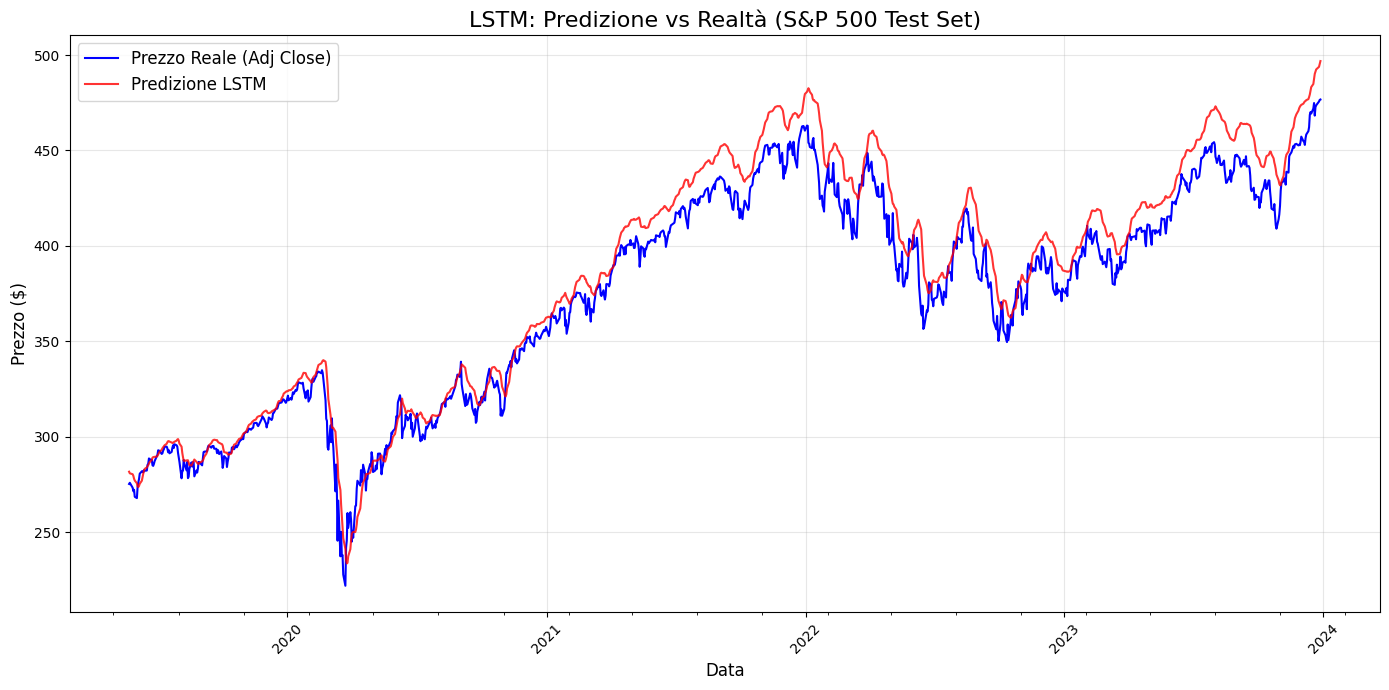

In [ ]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from utils.visualizzazione import evaluate_and_plot

DATA_DIR = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/data_split'
CSV_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/SPY.csv'
MODEL_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/baseline_models/best_lstm_spy_model.keras'
SCALER_PATH = os.path.join(DATA_DIR, 'scaler.pkl')

X_test = np.load(os.path.join(DATA_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(DATA_DIR, 'y_test.npy'))
scaler = joblib.load(SCALER_PATH)
model = load_model(MODEL_PATH)

evaluate_and_plot(
    model=model,
    X_test=X_test,   
    y_test=y_test,
    scaler=scaler,
    csv_path=CSV_PATH,
    model_name='LSTM',
    color='red'
)

### LSTM con sentiment


Generazione predizioni per LSTM...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
--- Risultati LSTM ---
MSE: $421.69
RMSE: $20.54
Primo prezzo (Reale): $352.53
Ultimo prezzo (Reale): $502.28


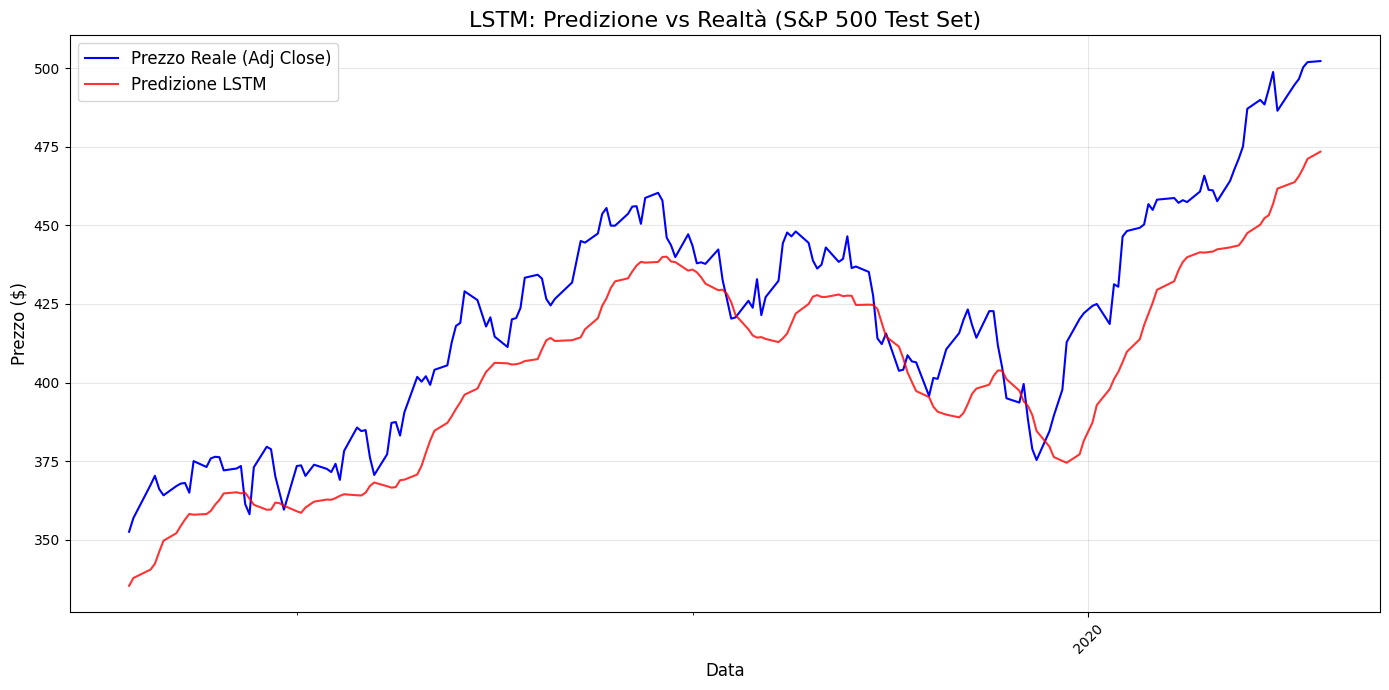

In [7]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from utils.visualizzazione import evaluate_and_plot

CSV_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/SPY.csv'
MODEL_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/hybrid_models/best_lstm_spy_model.keras'
SCALER_PATH = os.path.join(DATA_DIR, 'scaler.pkl')

X_test = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'X_test.npy'))
y_test = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'y_test.npy'))
scaler = joblib.load(SCALER_PATH)
model = load_model(MODEL_PATH)

evaluate_and_plot(
    model=model,
    X_test=X_test,   
    y_test=y_test,
    scaler=scaler,
    csv_path=CSV_PATH,
    model_name='LSTM',
    color='red'
)

### LSTM SOLO DATI TECNICI

Scaler caricato direttamente.
Generazione predizioni per LSTM...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
--- Risultati LSTM ---
MSE: $272.58
RMSE: $16.51
Primo prezzo (Reale): $352.53
Ultimo prezzo (Reale): $502.28


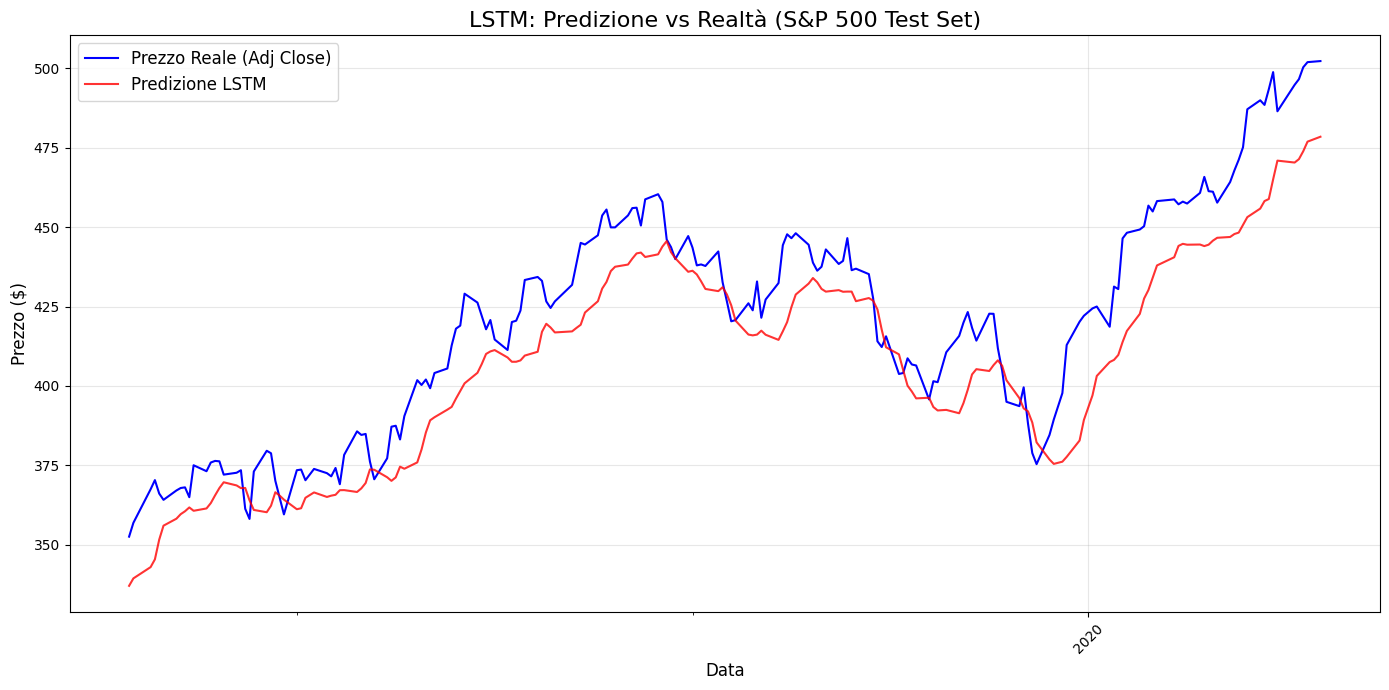

In [8]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from utils.visualizzazione import evaluate_and_plot

CSV_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/SPY.csv'
MODEL_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models/best_lstm_spy_model.keras'
SCALER_PATH = os.path.join(DATA_DIR, 'scaler.pkl') # Assicurati che DATA_DIR sia definito

# 1. Caricamento Dati
X_test = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'X_test.npy'))
y_test = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'y_test.npy'))

# ---------------------------------------------------------
# 2. MODIFICA FONDAMENTALE: Rimozione Sentiment
# ---------------------------------------------------------
X_test = X_test[:, :, :-1] 
# Ora la shape passa da (..., 60, 7) a (..., 60, 6)
# e corrisponde a quella del modello addestrato senza sentiment.

# 3. Gestione Scaler (Controllo se è un dizionario come prima)
scaler_loaded = joblib.load(SCALER_PATH)
if isinstance(scaler_loaded, dict) and 'financial' in scaler_loaded:
    scaler = scaler_loaded['financial']
    print("Scaler 'financial' estratto dal dizionario.")
else:
    scaler = scaler_loaded
    print("Scaler caricato direttamente.")

model = load_model(MODEL_PATH)

# 4. Valutazione
evaluate_and_plot(
    model=model,
    X_test=X_test,    
    y_test=y_test,
    scaler=scaler,
    csv_path=CSV_PATH,
    model_name='LSTM',
    color='red'
)